In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
from scipy.stats import expon, norm
import matplotlib.pyplot as plt

In [3]:
def process_tree_csv(filename):
    tree = pd.read_csv(filename).filter(['INVYR', 'CARBON_AG', 'TPA_UNADJ', 'STATECD', 'DIA', 'SPCD'])
    tree['CARBON_PERACRE'] = tree['CARBON_AG'] * tree['TPA_UNADJ']
    tree['DIA(CM)'] = tree['DIA'] * 2.54
    tree = tree[tree['INVYR']==2011].dropna(subset=['CARBON_PERACRE'])
    return tree

In [4]:
MA = process_tree_csv('MA_TREE.csv')
VT = process_tree_csv('VT_TREE.csv')
ME = process_tree_csv('ME_TREE.csv')
PA = process_tree_csv('PA_TREE.csv')
RI = process_tree_csv('RI_TREE.csv')
CT = process_tree_csv('CT_TREE.csv')
NH = process_tree_csv('NH_TREE.csv')
NY = process_tree_csv('NY_TREE.csv')
NJ = process_tree_csv('NJ_TREE.csv')
MD = process_tree_csv('MD_TREE.csv')
DE = process_tree_csv('DE_TREE.csv')
VA = process_tree_csv('VA_TREE.csv')
WV = process_tree_csv('WV_TREE.csv')
KY = process_tree_csv('KY_TREE.csv')

In [5]:
MA

,INVYR,CARBON_AG,TPA_UNADJ,STATECD,DIA,SPCD,CARBON_PERACRE,DIA(CM)
66489,2011,1142.648961,6.018046,25,15.9,806.0,6876.514009,40.386
66490,2011,329.050819,6.018046,25,10.6,802.0,1980.242965,26.924
66491,2011,228.853864,6.018046,25,7.9,806.0,1377.253081,20.066
66492,2011,467.390201,6.018046,25,11.2,806.0,2812.775730,28.448
66493,2011,806.602668,6.018046,25,13.4,806.0,4854.171960,34.036
...,...,...,...,...,...,...,...,...
70087,2011,284.000393,6.018046,25,9.2,372.0,1709.127429,23.368
70088,2011,256.394766,6.018046,25,8.9,372.0,1542.995496,22.606
70089,2011,503.942711,6.018046,25,11.3,833.0,3032.750416,28.702
70090,2011,561.468711,6.018046,25,11.8,833.0,3378.944530,29.972


In [6]:
allstates = [MA, VT, ME, NJ, CT, RI, NY, PA, NH, MD, DE, VA, WV, KY]
allstatesdf = pd.concat(allstates).replace({25:'Massachusetts', 50:'Vermont', 23:'Maine', 34:'New Jersey', 
                                    33:'New Hampshire', 9:'Connecticut', 42:'Pennsylvania', 36:'New York', 
                                    44:'Rhode Island', 24:'Maryland', 10:'Delaware', 21:'Kentucky', 
                                    54:'West Virginia', 51:'Virginia'})
allstatesdf

,INVYR,CARBON_AG,TPA_UNADJ,STATECD,DIA,SPCD,CARBON_PERACRE,DIA(CM)
66489,2011,1142.648961,6.018046,Massachusetts,15.9,806.0,6876.514009,40.386
66490,2011,329.050819,6.018046,Massachusetts,10.6,802.0,1980.242965,26.924
66491,2011,228.853864,6.018046,Massachusetts,7.9,806.0,1377.253081,20.066
66492,2011,467.390201,6.018046,Massachusetts,11.2,806.0,2812.775730,28.448
66493,2011,806.602668,6.018046,Massachusetts,13.4,806.0,4854.171960,34.036
...,...,...,...,...,...,...,...,...
250211,2011,44.199825,6.018046,Kentucky,6.1,318.0,265.996580,15.494
250212,2011,61.518514,6.018046,Kentucky,5.2,541.0,370.221247,13.208
250213,2011,200.120586,6.018046,Kentucky,9.3,712.0,1204.334892,23.622
250214,2011,1.799344,74.965282,Kentucky,1.0,541.0,134.888330,2.540


In [7]:
correlation_coefficient = np.corrcoef(allstatesdf['DIA(CM)'], allstatesdf['CARBON_PERACRE'])[0, 1]

print(f"Correlation Coefficient: {correlation_coefficient}")

Correlation Coefficient: 0.7843960309652758


In [8]:
def make_pie(state, state_name):
    def sum_carbon_ag_60(state):
        state_filtered_df = state[state['DIA(CM)'] > 60]
        total_carbon_60_state = state_filtered_df['CARBON_AG'].sum()
        return total_carbon_60_state

    def sum_carbon_ag_50_60(state):
        state_filtered_df = state[(state['DIA(CM)'] > 50) & (state['DIA(CM)'] <= 60)]
        total_carbon_50_60_state = state_filtered_df['CARBON_AG'].sum()
        return total_carbon_50_60_state

    def sum_carbon_ag_40_50(state):
        state_filtered_df = state[(state['DIA(CM)'] > 40) & (state['DIA(CM)'] <= 50)]
        total_carbon_40_50_state = state_filtered_df['CARBON_AG'].sum()
        return total_carbon_40_50_state

    def sum_carbon_ag_30_40(state):
        state_filtered_df = state[(state['DIA(CM)'] > 30) & (state['DIA(CM)'] <= 40)]
        total_carbon_30_40_state = state_filtered_df['CARBON_AG'].sum()
        return total_carbon_30_40_state

    def sum_carbon_ag_20_30(state):
        state_filtered_df = state[(state['DIA(CM)'] > 20) & (state['DIA(CM)'] <= 30)]
        total_carbon_20_30_state = state_filtered_df['CARBON_AG'].sum()
        return total_carbon_20_30_state

    def sum_carbon_ag_10_20(state):
        state_filtered_df = state[(state['DIA(CM)'] > 10) & (state['DIA(CM)'] <= 20)]
        total_carbon_10_20_state = state_filtered_df['CARBON_AG'].sum()
        return total_carbon_10_20_state

    def sum_carbon_ag_0_10(state):
        state_filtered_df = state[(state['DIA(CM)'] > 0) & (state['DIA(CM)'] <= 10)]
        total_carbon_0_10_state = state_filtered_df['CARBON_AG'].sum()
        return total_carbon_0_10_state

    def sum_carbon_ag_all(state):
        total_carbon_all_state = state['CARBON_AG'].sum()
        return total_carbon_all_state

    total_carbon_60_state = sum_carbon_ag_60(state)
    total_carbon_50_60_state = sum_carbon_ag_50_60(state)
    total_carbon_40_50_state = sum_carbon_ag_40_50(state)
    total_carbon_30_40_state = sum_carbon_ag_30_40(state)
    total_carbon_20_30_state = sum_carbon_ag_20_30(state)
    total_carbon_10_20_state = sum_carbon_ag_10_20(state)
    total_carbon_0_10_state = sum_carbon_ag_0_10(state)
    total_carbon_all_state = sum_carbon_ag_all(state)

    labels = ['>60', '50-60', '40-50', '30-40', '20-30', '10-20', '0-10']
    sizes = [
        (total_carbon_60_state / total_carbon_all_state),
        (total_carbon_50_60_state / total_carbon_all_state),
        (total_carbon_40_50_state / total_carbon_all_state),
        (total_carbon_30_40_state / total_carbon_all_state),
        (total_carbon_20_30_state / total_carbon_all_state),
        (total_carbon_10_20_state / total_carbon_all_state),
        (total_carbon_0_10_state / total_carbon_all_state)
    ]

    plt.pie(sizes, startangle=90)

    # Create a legend
    plt.legend(labels=[f'{label}: {size:.1%}' for label, size in zip(labels, sizes)], 
               loc="best", bbox_to_anchor=(0.9, 0.9), fontsize = 14)

    plt.axis('equal')
    plt.suptitle(f'{state_name}', y=1)
#     plt.show()



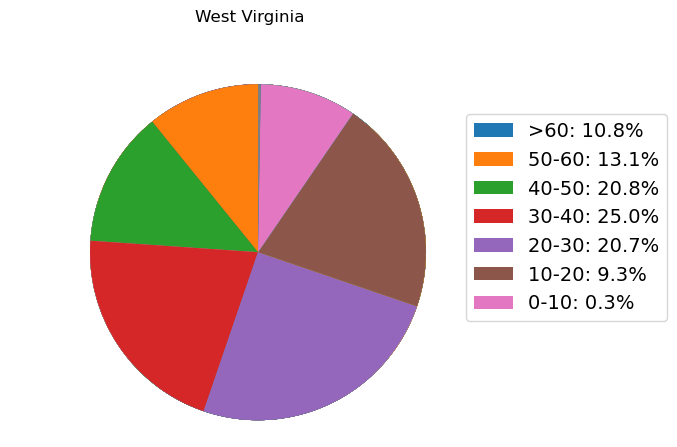

In [9]:
CT_pie = make_pie(CT, 'Connecticut')
DE_pie = make_pie(DE, 'Delaware')
KY_pie = make_pie(KY, 'Kentucky')
MA_pie = make_pie(MA, 'Massachusetts')
MD_pie = make_pie(MD, 'Maryland')
ME_pie = make_pie(ME, 'Maine')
NH_pie = make_pie(NH, 'New Hampshire')
NJ_pie = make_pie(NJ, 'New Jersey')
NY_pie = make_pie(NY, 'New York')
PA_pie = make_pie(PA, 'Pennsylvania')
RI_pie = make_pie(RI, 'Rhode Island')
VA_pie = make_pie(VA, 'Virginia')
VT_pie = make_pie(VT, 'Vermont')
WV_pie = make_pie(WV, 'West Virginia')

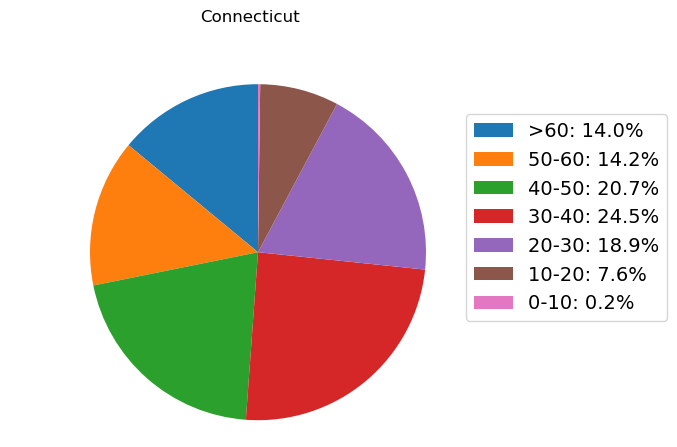

In [65]:
make_pie(CT, 'Connecticut')
plt.savefig('/Users/kerryflynn/Documents/Geography 642/CT_plot.png')

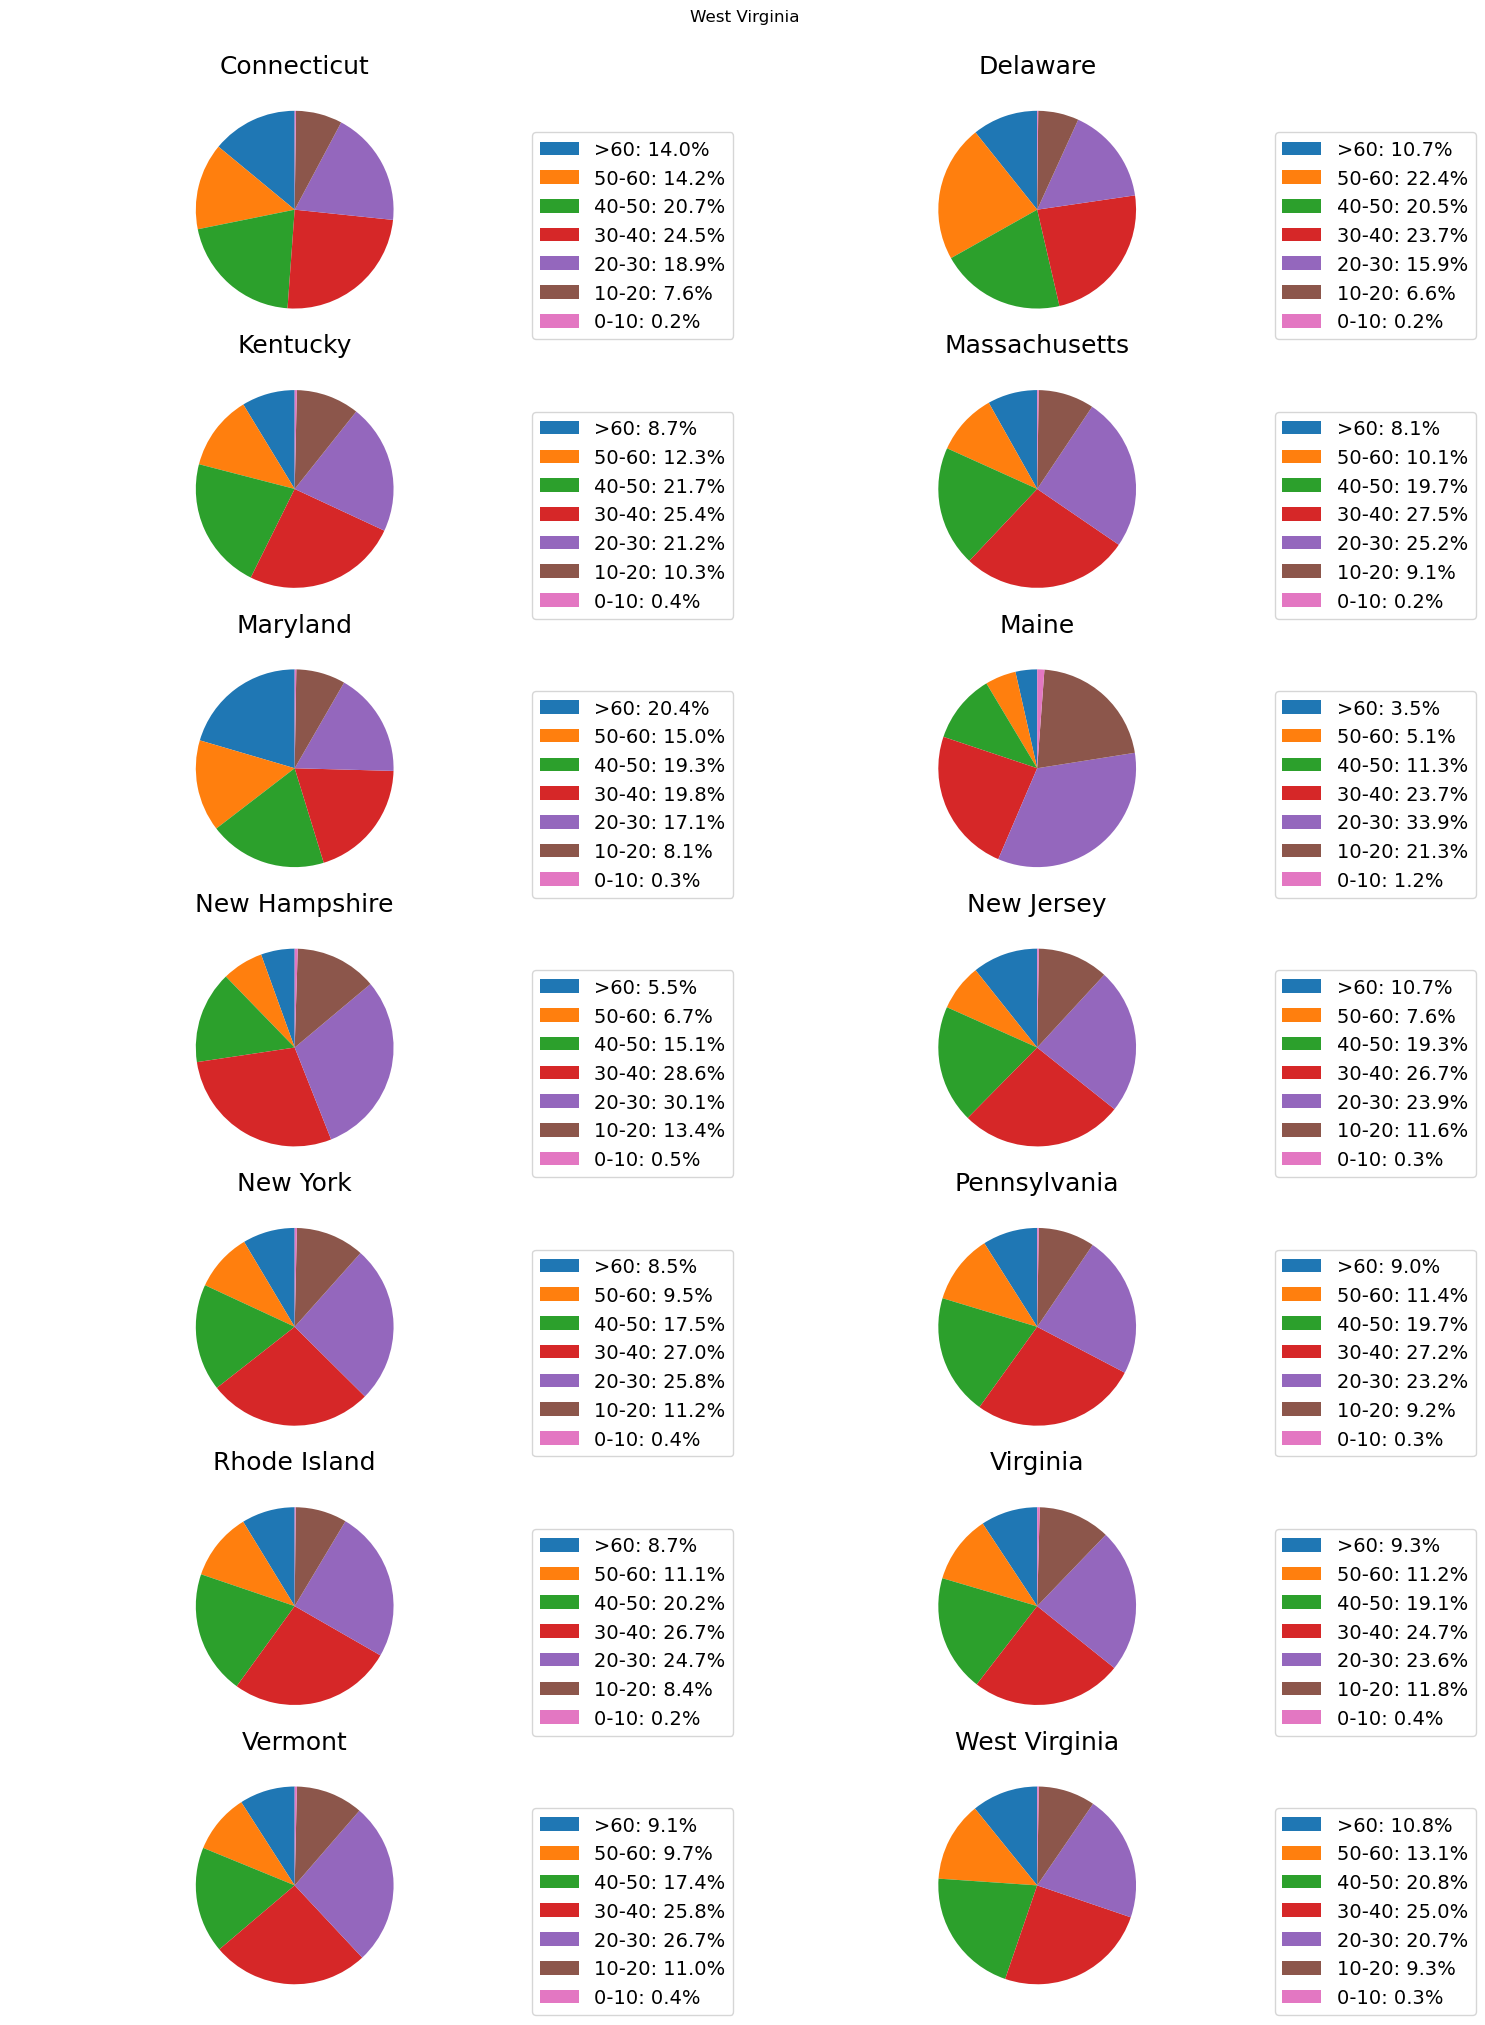

In [45]:
data_list = [CT, DE, KY, MA, MD, ME, NH, NJ, NY, PA, RI, VA, VT, WV]
names = ['Connecticut', 'Delaware', 'Kentucky', 'Massachusetts', 'Maryland', 'Maine', 'New Hampshire', 'New Jersey',
         'New York', 'Pennsylvania', 'Rhode Island', 'Virginia', 'Vermont', 'West Virginia']

# Create a single figure with subplots
fig, axes = plt.subplots(7, 2, figsize=(15, 20))
fig.subplots_adjust(hspace=1, top=3)  # Adjust vertical space between subplots

# Plot the pie charts
for i, (data, name) in enumerate(zip(data_list, names)):
    plt.subplot(7, 2, i+1)
    make_pie(data, name)  # Replace with your actual make_pie function
    plt.title(f'{name}', pad=20, fontsize=18)  # Set title for each pie chart

# Hide empty subplots
for i in range(len(data_list), len(axes.flatten())):
    axes.flatten()[i].axis('off')

# Adjust layout
plt.tight_layout()

# plt.savefig('/Users/kerryflynn/Documents/Geography 642/14_plots.png')

# Show the plots
plt.show()

In [12]:
def count(state):
    state_count_less_than_10 = (state['DIA(CM)'] < 10).sum()
    print('less than 10:'f'{state_count_less_than_10}')
    state_count_between_10_20 = ((state['DIA(CM)'] > 10) & (state['DIA(CM)'] <= 20)).sum()
    print('10-20:'f'{state_count_between_10_20}')
    state_count_between_20_30 = ((state['DIA(CM)'] > 20) & (state['DIA(CM)'] <= 30)).sum()
    print('20-30:'f'{state_count_between_20_30}')
    state_count_between_30_40 = ((state['DIA(CM)'] > 30) & (state['DIA(CM)'] <= 40)).sum()
    print('30-40:'f'{state_count_between_30_40}')
    state_count_between_40_50 = ((state['DIA(CM)'] > 40) & (state['DIA(CM)'] <= 50)).sum()
    print('40-50:'f'{state_count_between_40_50}')
    state_count_between_50_60 = ((state['DIA(CM)'] > 50) & (state['DIA(CM)'] <= 60)).sum()
    print('50-60:'f'{state_count_between_50_60}')
    state_count_greater_than_60 = (state['DIA(CM)'] > 60).sum()
    print('greater than 60:'f'{state_count_greater_than_60}')
    state_count_all = len((state['DIA(CM)']))
    print('all: 'f'{state_count_all}')

In [13]:
count(CT)

less than 10:173
10-20:565
20-30:400
30-40:207
40-50:101
50-60:49
greater than 60:27
all: 1522


In [14]:
from scipy.stats import norm
from scipy.integrate import quad
import matplotlib.pyplot as plt
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

def find_quad_integrals(state, statename):
    
    state_count_less_than_10 = (state['DIA(CM)'] < 10).sum()
#     print('less than 10:'f'{state_count_less_than_10}')
    state_count_between_10_20 = ((state['DIA(CM)'] > 10) & (state['DIA(CM)'] <= 20)).sum()
#     print('10-20:'f'{state_count_between_10_20}')
    state_count_between_20_30 = ((state['DIA(CM)'] > 20) & (state['DIA(CM)'] <= 30)).sum()
#     print('20-30:'f'{state_count_between_20_30}')
    state_count_between_30_40 = ((state['DIA(CM)'] > 30) & (state['DIA(CM)'] <= 40)).sum()
#     print('30-40:'f'{state_count_between_30_40}')
    state_count_between_40_50 = ((state['DIA(CM)'] > 40) & (state['DIA(CM)'] <= 50)).sum()
#     print('40-50:'f'{state_count_between_40_50}')
    state_count_between_50_60 = ((state['DIA(CM)'] > 50) & (state['DIA(CM)'] <= 60)).sum()
#     print('50-60:'f'{state_count_between_50_60}')
    state_count_greater_than_60 = (state['DIA(CM)'] > 60).sum()
#     print('greater than 60:'f'{state_count_greater_than_60}')
    
    X = state['DIA(CM)'].values.reshape(-1, 1) 
    y = state['CARBON_AG'].values

    degree = 2
    polyreg = make_pipeline(PolynomialFeatures(degree), LinearRegression())
    polyreg.fit(X, y)

    X_range = np.linspace(min(X), max(X), 1000).reshape(-1, 1)
    y_pred = polyreg.predict(X_range)

    plt.scatter(X, y, label='Data points')
    plt.plot(X_range, y_pred, color='red', label='Quadratic regression')
    plt.xlabel('Diameter (cm)')
    plt.ylabel('Carbon Aboveground (lbs)')
    plt.legend()
    plt.title(f'{statename} Tree Diameter vs Carbon Aboveground')
    plt.show()
    
    coefficients = polyreg.named_steps['linearregression'].coef_
    intercept = polyreg.named_steps['linearregression'].intercept_

    equation = lambda x: max(0, coefficients[2] * x**2 + coefficients[1] * x + intercept)
    equation_str = f"CARBON_AG = {coefficients[2]:.4f} * x^2 + {coefficients[1]:.4f} * x + {intercept:.4f} if x > 0 else 0"
    print("Equation of the quadratic regression line:")
    print(equation_str)
    
    quad_int1, _ = quad(equation, 0, 10)
    quad_int2, _ = quad(equation, 10, 20)
    quad_int3, _ = quad(equation, 20, 30)
    quad_int4, _ = quad(equation, 30, 40)
    quad_int5, _ = quad(equation, 40, 50)
    quad_int6, _ = quad(equation, 50, 60)
    quad_int7, _ = quad(equation, 60, state['DIA(CM)'].max())
    quad_int8, _ = quad(equation, 0, state['DIA(CM)'].max())

    
    int1 = quad_int1*state_count_less_than_10
    int2 = quad_int2*state_count_between_10_20
    int3 = quad_int3*state_count_between_20_30
    int4 = quad_int4*state_count_between_30_40
    int5 = quad_int5*state_count_between_40_50
    int6 = quad_int6*state_count_between_50_60
    int7 = quad_int7*state_count_greater_than_60
    
    intall = int1 + int2 + int3 + int4 + int5 + int6 + int7
    
    print(f'int 0-10: {int1}')
    print(f'int 10-20: {int2}')
    print(f'int 20-30: {int3}')
    print(f'int 30-40: {int4}')
    print(f'int 40-50: {int5}')
    print(f'int 50-60: {int6}')
    print(f'int 60+: {int7}')
    print(f'intall: {intall}')
    
    print(f'percent 0-10: {(int1/intall)*100}')
    print(f'percent 10-20: {(int2/intall)*100}')
    print(f'percent 20-30: {(int3/intall)*100}')
    print(f'percent 30-40: {(int4/intall)*100}')
    print(f'percent 40-50: {(int5/intall)*100}')
    print(f'percent 50-60: {(int6/intall)*100}')
    print(f'percent 60+: {(int7/intall)*100}')

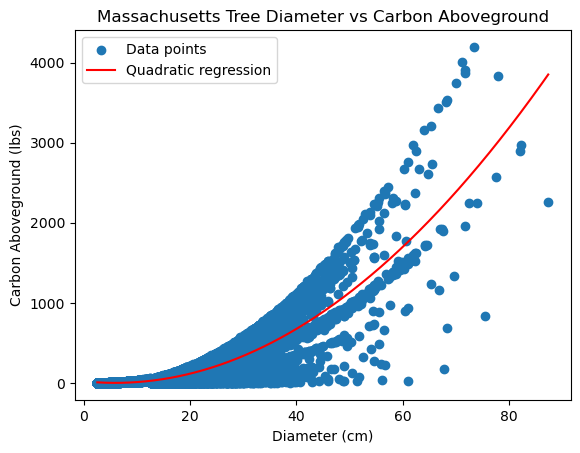

Equation of the quadratic regression line:
CARBON_AG = 0.5801 * x^2 + -6.8566 * x + 21.0317 if x > 0 else 0
int 0-10: 526180.3702400202
int 10-20: 6807782.530614646
int 20-30: 12744176.528042233
int 30-40: 8683325.100745413
int 40-50: 3906810.947230173
int 50-60: 1810479.9360804455
int 60+: 3994022.7610150427
intall: 38472778.17396797
percent 0-10: 1.3676692851779866
percent 10-20: 17.69506350654196
percent 20-30: 33.12517871835257
percent 30-40: 22.57004955940732
percent 40-50: 10.154740917238096
percent 50-60: 4.705872624778316
percent 60+: 10.381425388503756


In [15]:
find_quad_integrals(ME, 'Massachusetts')

In [16]:
ME['DIA(CM)'].max()

87.37599999999999

In [17]:
MA['DIA(CM)'].max()

103.12400000000001

In [18]:
RI['DIA(CM)'].max()

76.708

In [19]:
KY['DIA(CM)'].max()

156.21

In [20]:
DE['DIA(CM)'].max()

81.534

In [21]:
NY['DIA(CM)'].max()

128.524

In [22]:
NJ['DIA(CM)'].max()

99.06

In [23]:
VA['DIA(CM)'].max()

135.636

In [24]:
WV['DIA(CM)'].max()

105.41

In [25]:
NH['DIA(CM)'].max()

123.444

In [26]:
VT['DIA(CM)'].max()

115.57000000000001

In [27]:
MD['DIA(CM)'].max()

104.902

In [28]:
PA['DIA(CM)'].max()

114.3

In [29]:
CT['DIA(CM)'].max()

85.85199999999999

In [34]:
def quad_plot(state, state_name):
    X = state['DIA(CM)'].values.reshape(-1, 1) 
    y = state['CARBON_AG'].values

    degree = 2
    polyreg = make_pipeline(PolynomialFeatures(degree), LinearRegression())
    polyreg.fit(X, y)

    X_range = np.linspace(min(X), max(X), 1000).reshape(-1, 1)
    y_pred = polyreg.predict(X_range)

    plt.scatter(X, y, label='Data points')
    plt.plot(X_range, y_pred, color='red', label='Quadratic regression')
    plt.xlabel('Diameter (cm)')
    plt.ylabel('Carbon Aboveground (lbs)')
    plt.legend()
    plt.title(f'{state_name} Tree Diameter vs Carbon Aboveground')
    plt.show()
    
    coefficients = polyreg.named_steps['linearregression'].coef_
    intercept = polyreg.named_steps['linearregression'].intercept_

    equation_str = f"CARBON_AG = {coefficients[2]:.4f} * x^2 + {coefficients[1]:.4f} * x + {intercept:.4f} if x > 0 else 0"
    print("Equation of the quadratic regression line:")
    print(equation_str)

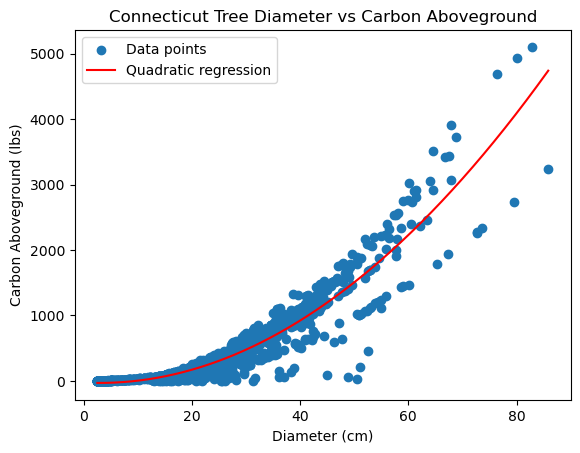

Equation of the quadratic regression line:
CARBON_AG = 0.6947 * x^2 + -4.1122 * x + -26.4324 if x > 0 else 0


In [64]:
CTquad = quad_plot(CT, 'Connecticut')
# DEquad = quad_plot(DE, 'Delaware')
# KYquad = quad_plot(KY, 'Kentucky')
# MAquad = quad_plot(MA, 'Massachusetts')
# MDquad = quad_plot(MD, 'Maryland')
# MEquad = quad_plot(ME, 'Maine')
# NHquad = quad_plot(NH, 'New Hampshire')
# NJquad = quad_plot(NJ, 'New Jersey')
# NYquad = quad_plot(NY, 'New York')
# PAquad = quad_plot(PA, 'Pennsylvania')
# RIquad = quad_plot(RI, 'Rhode Island')
# VAquad = quad_plot(VA, 'Virginia')
# VTquad = quad_plot(VT, 'Vermont')
# WVquad = quad_plot(WV, 'West Virginia')